In [1]:
#initialize
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.patches as mpatches
import seaborn as sns

1. Chemical composition of pottery

You work for a pottery manufacturing company that produces two different types of products
A and B. Product A uses raw material from Llanedyrn and Product B uses raw material from
Isle Thorns and Ashley Rails1. Your company is informed that Llanedyrn will be closing
soon for maintenance and your entire production of product A is at risk.

You received a potential new source of raw material from site Caldicot and you analyzed
two samples to compare them to your existing samples from the other three sites. As
the new data scientist of the company you are asked to look into the data and give your
recommendation regarding the suitability of raw material from Caldicot as a replacement
for Llanedyrn.

The ask ”look into the data” normally calls for an unsupervised learning exercise, since
there is no clear output you are asked to predict. You will investigate the multivariate chem-
ical composition of the raw material from four different sources using Principal Component
Analysis.

1.1.1 - Import and view the data

In [2]:
#Reading in the CSV file and seeing the outputs
pot = pd.read_csv('Pottery.csv')
display(pot.head(10))
pot.describe()

,Unnamed: 0,Site,Al,Fe,Mg,Ca,Na
0,1,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,2,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,3,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,4,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,5,Llanedyrn,13.8,7.06,5.34,0.20,0.20
5,6,Llanedyrn,10.9,6.26,3.47,0.17,0.22
6,7,Llanedyrn,10.1,4.26,4.26,0.20,0.18
7,8,Llanedyrn,11.6,5.78,5.91,0.18,0.16
8,9,Llanedyrn,11.1,5.49,4.52,0.29,0.30
9,10,Llanedyrn,13.4,6.92,7.23,0.28,0.20


,Unnamed: 0,Al,Fe,Mg,Ca,Na
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,13.500000,14.492308,4.467692,3.141538,0.146538,0.158462
std,7.648529,2.992647,2.409751,2.179726,0.101230,0.135283
min,1.000000,10.100000,0.920000,0.530000,0.010000,0.030000
25%,7.250000,11.950000,1.700000,0.670000,0.060000,0.050000
50%,13.500000,13.800000,5.465000,3.825000,0.155000,0.150000
75%,19.750000,17.450000,6.590000,4.502500,0.215000,0.215000
max,26.000000,20.800000,7.090000,7.230000,0.310000,0.540000


There are 7 columns, columns 3-7 (the ones with the elements) that will be used for PCA

1.1.2 - Pre-process the data and perform PCA with 3 PCs

In [3]:
location = pot['Site']
pot_element = pot.iloc[:, 2:7]
#standardizing data
pot_transformed = StandardScaler().fit_transform(pot_element)
#performing PCA
pca = PCA(n_components=3, svd_solver='full')
pca_element = pca.fit_transform(pot_transformed)

scores_pd = pd.DataFrame(data = pca_element,columns = ['PC1', 'PC2', 'PC3'],index = pot_element.index)
#dataframe to be used for PCA plot
pot_element_score = pd.concat([scores_pd, location], axis = 1)

1.1.3 - Plot the cumulative explained variance graph. What percent of the variance do the
first 2 and 3 components describe?

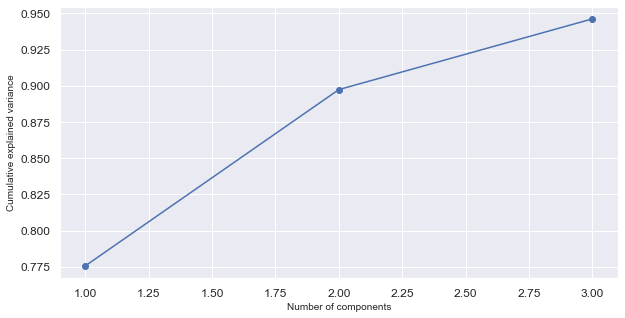

[0.7755594  0.89732137 0.9461598 ]


In [8]:
#Plotting of the cumulative explained variance for 3 PC's
cum_exp_var = np.cumsum(pca.explained_variance_ratio_)

sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,5)})

plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=10)
plt.ylabel('Cumulative explained variance', fontsize=10);
plt.tick_params(labelsize=12)
plt.show()
print(cum_exp_var)

The first 2 PC's describe 89.7% of the variance and the first 3 PC's describe 94.6% of the variance

1.1.4 - Plot the scores-loadings graph for PC1-PC2. Visualize the different sites with a different colour or symbol.

In [5]:
pot_loading_pd = pd.DataFrame(data = pca.components_.T,columns = ['PC1', 'PC2', 'PC3'],index = pot_element.columns)

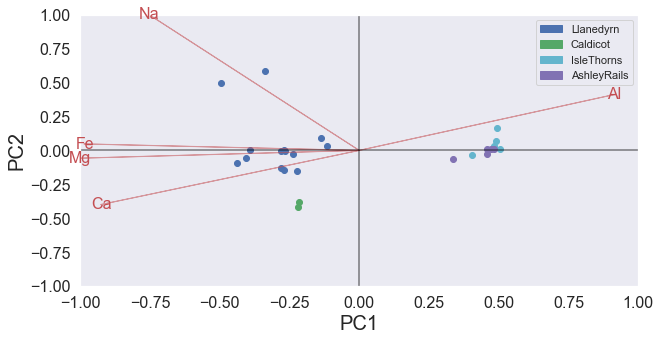

In [6]:
# adjusting the scores to fit in (-1,1)
pot_x = pca_element[:,:2]
xt = pot_x[:,0]
yt = pot_x[:,1]

scalext = 1.0/(xt.max() - xt.min())
scaleyt = 1.0/(yt.max() - yt.min())
xt_scaled = xt * scalext
yt_scaled = yt * scaleyt
# adjusting the loadings to fit in (-1,1)
p = pot_loading_pd.iloc[:,:2]
p_scaled = MaxAbsScaler().fit_transform(p)
n = pot_loading_pd.shape[0]

sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,5)})
#plotting scatter plot associated with each location
for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T,scores_pd.index):
    if pot_element_score.loc[label, ['Site']].eq('Llanedyrn').any() == True:
        plt.scatter(x, y, color = 'b')
    elif pot_element_score.loc[label, ['Site']].eq('Caldicot').any() == True:
        plt.scatter(x, y, color = 'g')
    elif pot_element_score.loc[label, ['Site']].eq('IsleThorns').any() == True:
        plt.scatter(x, y, color = 'c')
    elif pot_element_score.loc[label, ['Site']].eq('AshleyRails').any() == True:
        plt.scatter(x, y, color = 'm')
    
#plotting the arrow vectors of each variable
for i in range(n):
    plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
    
    plt.text(p_scaled[i,0], p_scaled[i,1], pot_loading_pd.index[i], color = 'r', ha = 'center', va = 'center', size=16)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1), fontsize=20)
plt.ylabel("PC{}".format(2), fontsize=20)
plt.tick_params(labelsize=16)
#legend formatting
blue_patch = mpatches.Patch(color='b', label='Llanedyrn')
green_patch = mpatches.Patch(color='g', label='Caldicot')
cyan_patch = mpatches.Patch(color='c', label='IsleThorns')
magenta_patch = mpatches.Patch(color='m', label='AshleyRails')
plt.legend(handles=[blue_patch, green_patch, cyan_patch, magenta_patch])

plt.axvline(x=0, c="black", alpha = 0.5)
plt.axhline(y=0, c="black", alpha = 0.5)
plt.grid()

1.1.5 - How does the map of scores-loadings explains the reason that your company uses the raw material from Isle Thorns and Ashley Rails to manufacture Product B?

Using the map of scores-loadings of the pot composition and the locations classified by colour, we can see that the compositions of pots made from the raw materials of IsleThorns and AshleyRails are highly concentrated in aluminum. Thus, it would explain the reason why product B is produced using the raw materials from IsleThorns and AshleyRails.

1.1.6 - Is the raw material from Caldicot a good replacement for Llanedyrn? Yes or no and why?

The raw material from Caldicot is NOT a good replacement for the raw material from Llanedyrn.

Explanation will be done by using the scores-loading graph.
Even though both locations have materials that contain below average concentrations of aluminum, we can see that the raw materials from Caldicot have a lower concentration in the three components Llanedyrn ore is defined by: Na, Fe, and Mg. Additionally, it seems that Caldicot material only has comparable calcium concentrations when compared to the Llanedyrn material. Thus, the raw material from Caldicot is not a good replacement for product A.

1.1.7 - What are the biggest differences in the two big clusters? How are the two samples from the candidate Caldicot different than the Llanedyrn samples?

A big difference in the two big clusters is that the Llanedyrn samples are concentrated with 4 components and have below average concentrations of Al. The second big cluster is only influenced by Al and negatively influenced by the 4 components in the Llanedyrn samples. This reflects that the samples from the second cluster are mainly comprised of Aluminum, with a much lower concentration of the other elements as opposed to the raw material from Llanedyrn. Similarly, the raw material from Llanedyrn have a lower concentration of Aluminum.

The two samples from Caldicot are different from those from Llanedyrn because we can see the negative influence of Na, Fe, and Mg on the Caldicot samples, where as the Llanedyrn samples are positively influenced by these elements. This reflects that the samples from Caldicot carry a Calcium concentration, and much less concentration of the other 3 elements found in Llanedyrn samples.

1.1.8 - Confirm the answers by producing the boxplot of the 5 variables grouped by the site of the raw material shown below.

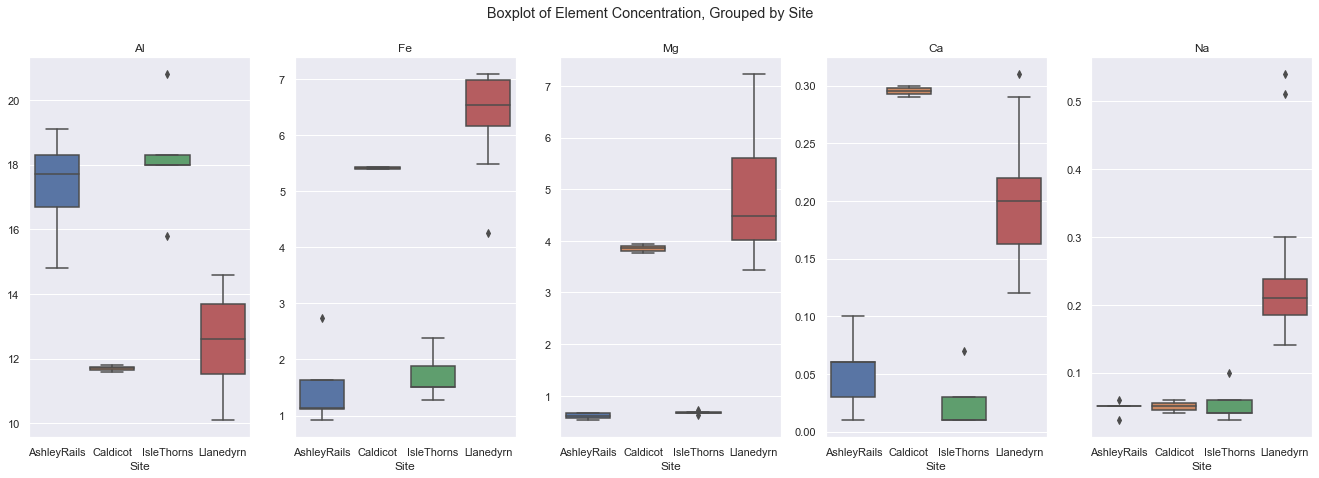

In [7]:
#cleaning the data
pot_plot = pot.drop(['Unnamed: 0'], axis = 1)
#Using seaborn to create the box plots
sns.set(rc={'figure.figsize':(23,7)})
f, axes = plt.subplots(1,5)
f.suptitle('Boxplot of Element Concentration, Grouped by Site')
plot = sns.boxplot(data = pot_plot, x = 'Site', y = "Al", order = ['AshleyRails', 'Caldicot', 'IsleThorns', 'Llanedyrn'], ax = axes[0])
plot.set(ylabel = None, title = 'Al')

plot = sns.boxplot(data = pot_plot, x = 'Site', y = "Fe", order = ['AshleyRails', 'Caldicot', 'IsleThorns', 'Llanedyrn'], ax = axes[1])
plot.set(ylabel = None, title = 'Fe')

plot = sns.boxplot(data = pot_plot, x = 'Site', y = "Mg", order = ['AshleyRails', 'Caldicot', 'IsleThorns', 'Llanedyrn'], ax = axes[2])
plot.set(ylabel = None, title = 'Mg')

plot = sns.boxplot(data = pot_plot, x = 'Site', y = "Ca", order = ['AshleyRails', 'Caldicot', 'IsleThorns', 'Llanedyrn'], ax = axes[3])
plot.set(ylabel = None, title = 'Ca')

plot = sns.boxplot(data = pot_plot, x = 'Site', y = "Na", order = ['AshleyRails', 'Caldicot', 'IsleThorns', 'Llanedyrn'], ax = axes[4])
plot.set(ylabel = None, title = 'Na')
plt.show()
